In [1]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib as mpl
import glob

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
model = "Multimodel"
print(model)
experiment = "ssp585"
print(experiment)

Multimodel
ssp585


## Siconc

In [130]:
variable = "siconc"
import cartopy.feature as cfeature

In [131]:
files=glob.glob("Data/{}_*_{}_percentage.nc".format(variable,experiment))
files = sorted(files)
files

['Data/siconc_ACCESS-ESM1-5_ssp585_percentage.nc',
 'Data/siconc_CMCC-ESM2_ssp585_percentage.nc',
 'Data/siconc_EC-Earth3-CC_ssp585_percentage.nc',
 'Data/siconc_IPSL-CM6A-LR_ssp585_percentage.nc',
 'Data/siconc_MPI-ESM1-2-HR_ssp585_percentage.nc']

In [132]:
for i in range(5):
    print(i)
    globals()[f"model{i}"] = regex.search(r"(?<=Data/.*?_)[^_]*", files[i]).group()
    
    nc = xarray.open_dataset(files[i])

    lat = nc['lat'].values 
    lon = nc['lon'].values
    globals()[f"var{i}"] = nc[variable].values
    var = nc[variable].values
    
    var_upper = np.nanquantile(var[var>0], 0.9)
    var_lower = np.nanquantile(var[var<0], 0.1)
    globals()[f"label{i}"] = abs(max([var_upper, var_lower], key = abs))
    
    globals()[f"x{i}"], globals()[f"y{i}"] = np.meshgrid(lon, lat)

0
1
2
3
4


ACCESS-ESM1-5
CMCC-ESM2
EC-Earth3-CC
IPSL-CM6A-LR
MPI-ESM1-2-HR


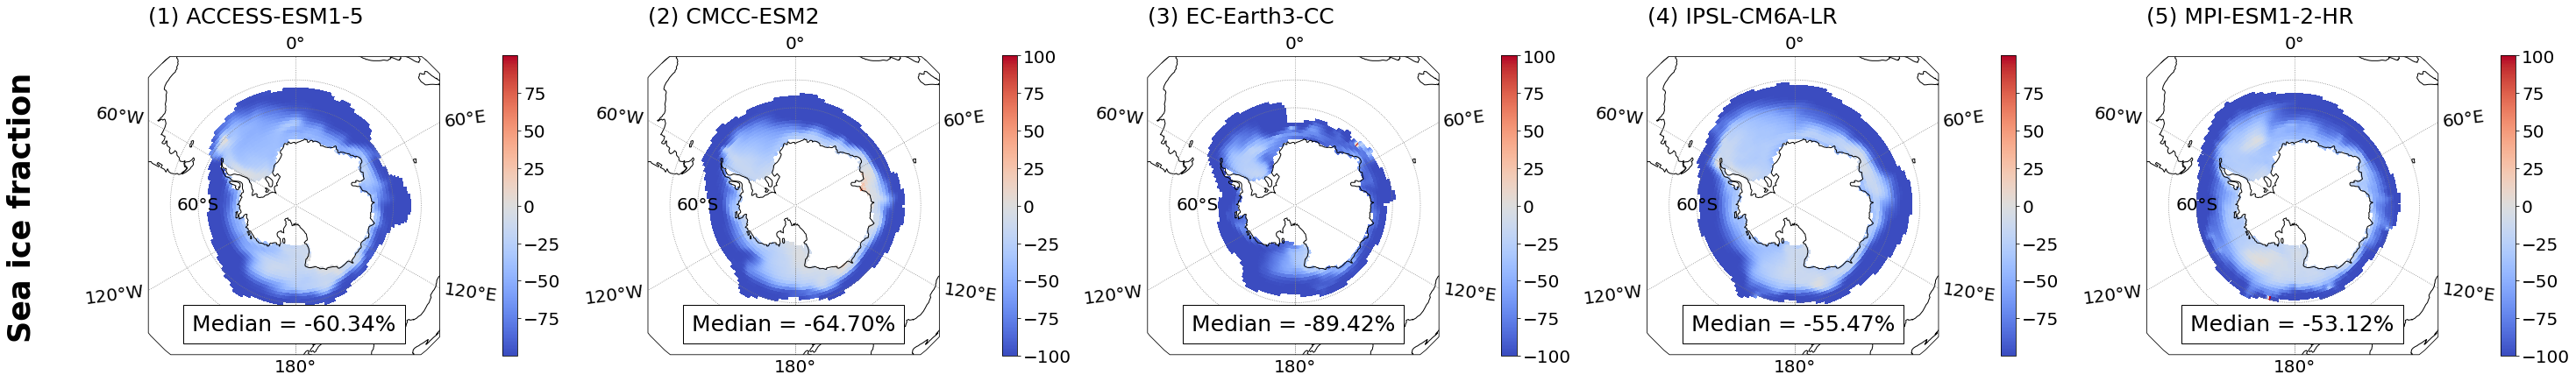

In [133]:
fig, ax = plt.subplots(1, 5, figsize=(45,7), subplot_kw={'projection': cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90)})
fig.subplots_adjust(left = 0.05, wspace = 0.2)
fig.text(0, 0.5, "Sea ice fraction", va = "center", ha = "left", rotation=90, fontsize = 35, fontweight = "bold")


for i in range(5):
    print(globals()[f"model{i}"])
    name = i+1
    
    ax[i].set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

    gl1 = ax[i].gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


    gl1.ylabel_style = {'size': 20}
    gl1.xlabel_style = {'size': 20}

    gl1.ylocator = mticker.FixedLocator([-60, -50])

    plt.draw()
    for ea in gl1.label_artists:
        if ea[0]== 'lat':
            tx = ea[2]
            xy = tx.get_position()
            if xy[0]!=-90:
                tx.set_position([-90, xy[1]])



    ax[i].set_title("({}) {}".format(name, globals()[f"model{i}"]), fontsize = 25, pad = 15, loc = "left")
    ax[i].TitleHorizontalAlignment = 'left'

    divnorm = colors.TwoSlopeNorm(vmin = -(globals()[f"label{i}"]), vcenter = 0., vmax = globals()[f"label{i}"])

    p = ax[i].pcolor(globals()[f"x{i}"], globals()[f"y{i}"], globals()[f"var{i}"], 
                  cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


    ax[i].coastlines()


    mean2014 = AnchoredText("Median = {0:.2f}%".format(np.nanmedian(globals()[f"var{i}"])), loc="lower center",
                       prop=dict(fontsize=25))
    ax[i].add_artist(mean2014)

    cb = plt.colorbar(p, ax = ax[i], shrink=0.9, pad = 0.15)
    for t in cb.ax.get_yticklabels():
        t.set_fontsize(20)

plt.savefig("output/Multimodel/{}.png".format(variable))

plt.show()

## NPP

In [134]:
variable = "intpp"
import cartopy.feature as cfeature

In [135]:
files=glob.glob("Data/{}_*_{}_percentage.nc".format(variable,experiment))
files = sorted(files)
files

['Data/intpp_ACCESS-ESM1-5_ssp585_percentage.nc',
 'Data/intpp_CMCC-ESM2_ssp585_percentage.nc',
 'Data/intpp_EC-Earth3-CC_ssp585_percentage.nc',
 'Data/intpp_IPSL-CM6A-LR_ssp585_percentage.nc',
 'Data/intpp_MPI-ESM1-2-HR_ssp585_percentage.nc']

In [136]:
for i in range(5):
    print(i)
    globals()[f"model{i}"] = regex.search(r"(?<=Data/.*?_)[^_]*", files[i]).group()
    
    nc = xarray.open_dataset(files[i])

    lat = nc['lat'].values 
    lon = nc['lon'].values
    globals()[f"var{i}"] = nc[variable].values
    var = nc[variable].values
    
    var_upper = np.nanquantile(var[var>0], 0.9)
    var_lower = np.nanquantile(var[var<0], 0.1)
    globals()[f"label{i}"] = abs(max([var_upper, var_lower], key = abs))
    
    globals()[f"x{i}"], globals()[f"y{i}"] = np.meshgrid(lon, lat)

0
1
2
3
4


ACCESS-ESM1-5
CMCC-ESM2
EC-Earth3-CC
IPSL-CM6A-LR
MPI-ESM1-2-HR


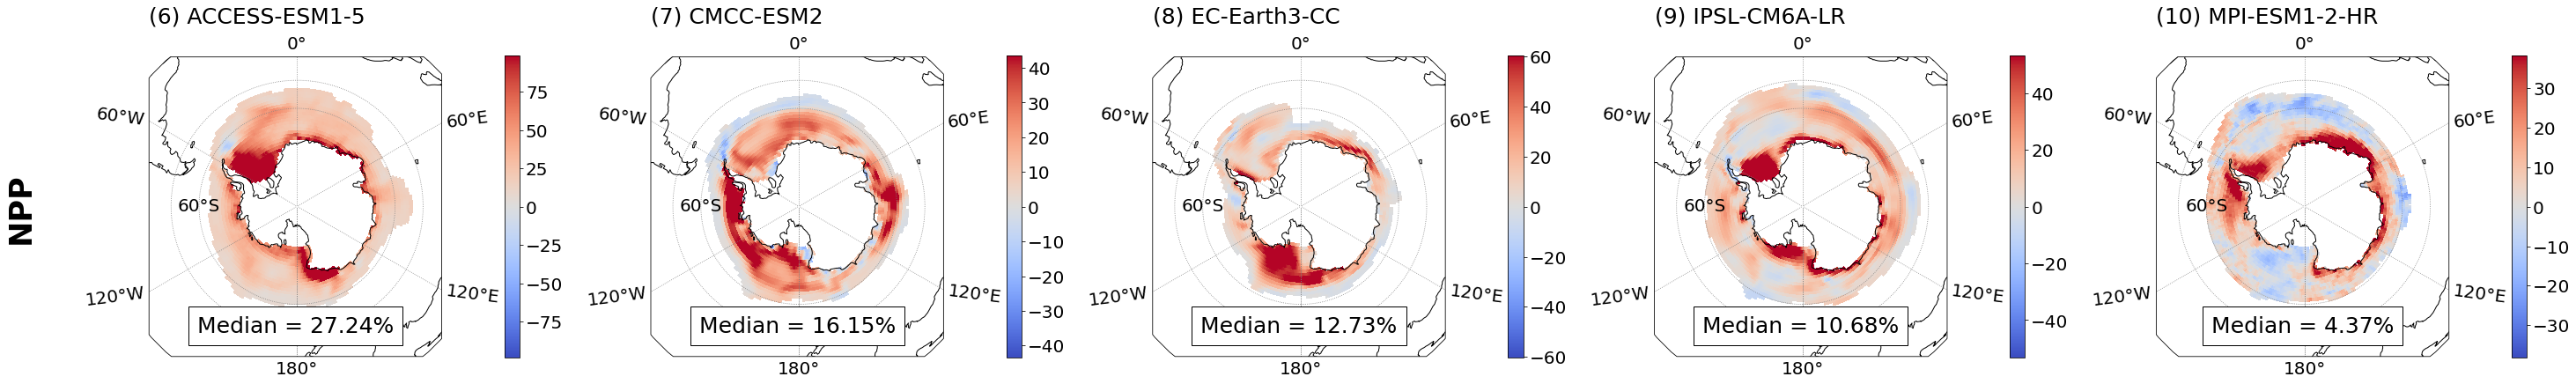

In [137]:
fig, ax = plt.subplots(1, 5, figsize=(45,7), subplot_kw={'projection': cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90)})
fig.subplots_adjust(left = 0.05, wspace = 0.2)
fig.text(0, 0.5, "NPP", va = "center", ha = "left", rotation=90, fontsize = 35, fontweight = "bold")


for i in range(5):
    print(globals()[f"model{i}"])
    name = i+6
    
    ax[i].set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

    gl1 = ax[i].gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


    gl1.ylabel_style = {'size': 20}
    gl1.xlabel_style = {'size': 20}

    gl1.ylocator = mticker.FixedLocator([-60, -50])

    plt.draw()
    for ea in gl1.label_artists:
        if ea[0]== 'lat':
            tx = ea[2]
            xy = tx.get_position()
            if xy[0]!=-90:
                tx.set_position([-90, xy[1]])



    ax[i].set_title("({}) {}".format(name, globals()[f"model{i}"]), fontsize = 25, pad = 15, loc = "left")
    ax[i].TitleHorizontalAlignment = 'left'

    divnorm = colors.TwoSlopeNorm(vmin = -(globals()[f"label{i}"]), vcenter = 0., vmax = globals()[f"label{i}"])

    p = ax[i].pcolor(globals()[f"x{i}"], globals()[f"y{i}"], globals()[f"var{i}"], 
                  cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


    ax[i].coastlines()


    mean2014 = AnchoredText("Median = {0:.2f}%".format(np.nanmedian(globals()[f"var{i}"])), loc="lower center",
                       prop=dict(fontsize=25))
    ax[i].add_artist(mean2014)

    cb = plt.colorbar(p, ax = ax[i], shrink=0.9, pad = 0.15)
    for t in cb.ax.get_yticklabels():
        t.set_fontsize(20)

plt.savefig("output/Multimodel/{}.png".format(variable))

plt.show()

## Diatom

In [205]:
variable = "intppdiat"
import cartopy.feature as cfeature

In [206]:
files=glob.glob("Data/{}_*_{}_percentage.nc".format(variable,experiment))
files = sorted(files)

files.append("na")
files.insert(0, "na")

files

['na',
 'Data/intppdiat_CMCC-ESM2_ssp585_percentage.nc',
 'Data/intppdiat_EC-Earth3-CC_ssp585_percentage.nc',
 'Data/intppdiat_IPSL-CM6A-LR_ssp585_percentage.nc',
 'na']

In [207]:
for i in range(5):
    if i == 0 :
        print("No data")
        globals()[f"model{i}"] = "ACCESS-ESM1-5"
        
        lat = [0,0] 
        lon = [0,0]
        globals()[f"var{i}"] = [0,0]
        var = 0

        var_upper = 0
        var_lower = 1
        globals()[f"label{i}"] = abs(max([var_upper, var_lower], key = abs))

        globals()[f"x{i}"], globals()[f"y{i}"] = np.meshgrid(lon, lat)
        
    elif i == 4:
        print("No data")
        globals()[f"model{i}"] = "MPI-ESM1-2-HR"
        
        lat = 0 
        lon = 0
        globals()[f"var{i}"] = [0,0]
        var = 0

        var_upper = 0
        var_lower = 1
        globals()[f"label{i}"] = abs(max([var_upper, var_lower], key = abs))

        globals()[f"x{i}"], globals()[f"y{i}"] = np.meshgrid(lon, lat)
        
    else:
        print(i)
        globals()[f"model{i}"] = regex.search(r"(?<=Data/.*?_)[^_]*", files[i]).group()

        nc = xarray.open_dataset(files[i])

        lat = nc['lat'].values 
        lon = nc['lon'].values
        globals()[f"var{i}"] = nc[variable].values
        var = nc[variable].values

        var_upper = np.nanquantile(var[var>0], 0.9)
        var_lower = np.nanquantile(var[var<0], 0.1)
        globals()[f"label{i}"] = abs(max([var_upper, var_lower], key = abs))

        globals()[f"x{i}"], globals()[f"y{i}"] = np.meshgrid(lon, lat)

No data
1
2
3
No data


0
ACCESS-ESM1-5
No data
1
CMCC-ESM2
Yes data!
2
EC-Earth3-CC
Yes data!
3
IPSL-CM6A-LR
Yes data!
4
MPI-ESM1-2-HR
No data


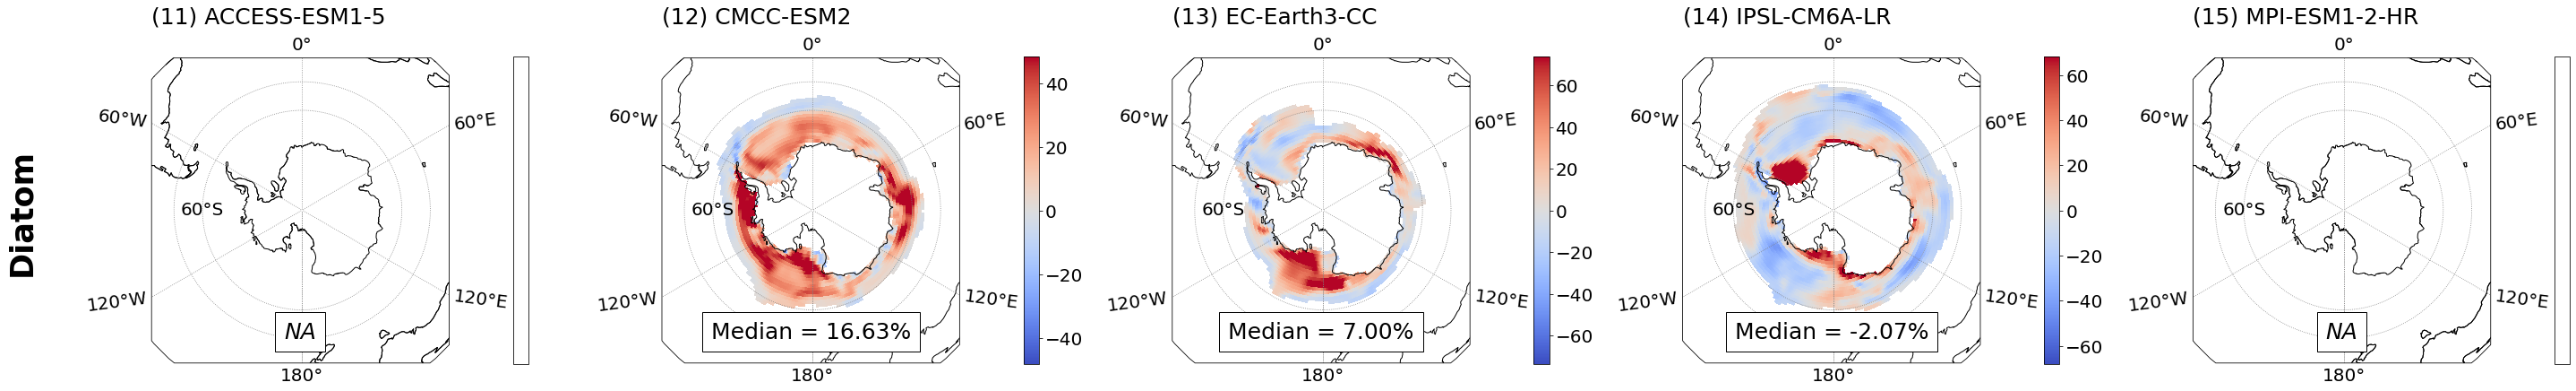

In [208]:
fig, ax = plt.subplots(1, 5, figsize=(45,7),                       sharex = True, sharey = True,
                       subplot_kw={'projection': cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90)})
fig.subplots_adjust(left = 0.05, wspace = 0.2)
fig.text(0, 0.5, "Diatom", va = "center", ha = "left", rotation=90, fontsize = 35, fontweight = "bold")

white = mcol.LinearSegmentedColormap.from_list("", ["white","white","white"])

for i in range(5):
    print(i)
    print(globals()[f"model{i}"])
    name = i+11
    
    if i == 0:
        print("No data")
        ax[i].set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

        gl1 = ax[i].gridlines(crs = cartopy.crs.PlateCarree(),
                      draw_labels = True,
                      color = 'grey',
                      linestyle = ':',
                      y_inline = True,
                      x_inline = False) 


        gl1.ylabel_style = {'size': 20}
        gl1.xlabel_style = {'size': 20}

        gl1.ylocator = mticker.FixedLocator([-60, -50])

        plt.draw()
        for ea in gl1.label_artists:
            if ea[0]== 'lat':
                tx = ea[2]
                xy = tx.get_position()
                if xy[0]!=-90:
                    tx.set_position([-90, xy[1]])



        ax[i].set_title("({}) {}".format(name, globals()[f"model{i}"]), fontsize = 25, pad = 15, loc = "left")
        ax[i].TitleHorizontalAlignment = 'left'

        ax[i].coastlines()
        
        p = ax[i].pcolor(x1, y1, var1, 
                      cmap = white,  transform = cartopy.crs.PlateCarree() )


        ax[i].coastlines()


        cb = plt.colorbar(p, ax = ax[i], shrink=0.9, pad = 0.15)
        cb.set_ticks([])
      
        mean2014 = AnchoredText("NA", loc="lower center", 
                           prop=dict(fontsize=25, fontstyle = "italic"))
        ax[i].add_artist(mean2014)
        
        
    elif i == 4:
        print("No data")
        ax[i].set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

        gl1 = ax[i].gridlines(crs = cartopy.crs.PlateCarree(),
                      draw_labels = True,
                      color = 'grey',
                      linestyle = ':',
                      y_inline = True,
                      x_inline = False) 


        gl1.ylabel_style = {'size': 20}
        gl1.xlabel_style = {'size': 20}

        gl1.ylocator = mticker.FixedLocator([-60, -50])

        plt.draw()
        for ea in gl1.label_artists:
            if ea[0]== 'lat':
                tx = ea[2]
                xy = tx.get_position()
                if xy[0]!=-90:
                    tx.set_position([-90, xy[1]])



        ax[i].set_title("({}) {}".format(name, globals()[f"model{i}"]), fontsize = 25, pad = 15, loc = "left")
        ax[i].TitleHorizontalAlignment = 'left'

        ax[i].coastlines()

        p = ax[i].pcolor(x1, y1, var1, 
                      cmap = white, transform = cartopy.crs.PlateCarree() )


        ax[i].coastlines()

        cb = plt.colorbar(p, ax = ax[i], shrink=0.9, pad = 0.15)
        cb.set_ticks([])
        
        mean2014 = AnchoredText("NA", loc="lower center",
                           prop=dict(fontsize=25, fontstyle = "italic"))
        ax[i].add_artist(mean2014)
    
    else:
        print("Yes data!")
        ax[i].set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

        gl1 = ax[i].gridlines(crs = cartopy.crs.PlateCarree(),
                      draw_labels = True,
                      color = 'grey',
                      linestyle = ':',
                      y_inline = True,
                      x_inline = False) 


        gl1.ylabel_style = {'size': 20}
        gl1.xlabel_style = {'size': 20}

        gl1.ylocator = mticker.FixedLocator([-60, -50])

        plt.draw()
        for ea in gl1.label_artists:
            if ea[0]== 'lat':
                tx = ea[2]
                xy = tx.get_position()
                if xy[0]!=-90:
                    tx.set_position([-90, xy[1]])



        ax[i].set_title("({}) {}".format(name, globals()[f"model{i}"]), fontsize = 25, pad = 15, loc = "left")
        ax[i].TitleHorizontalAlignment = 'left'

        divnorm = colors.TwoSlopeNorm(vmin = -(globals()[f"label{i}"]), vcenter = 0., vmax = globals()[f"label{i}"])

        p = ax[i].pcolor(globals()[f"x{i}"], globals()[f"y{i}"], globals()[f"var{i}"], 
                      cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


        ax[i].coastlines()


        mean2014 = AnchoredText("Median = {0:.2f}%".format(np.nanmedian(globals()[f"var{i}"])), loc="lower center",
                           prop=dict(fontsize=25))
        ax[i].add_artist(mean2014)

        cb = plt.colorbar(p, ax = ax[i], shrink=0.9, pad = 0.15)
        for t in cb.ax.get_yticklabels():
            t.set_fontsize(20)

plt.savefig("output/Multimodel/{}.png".format(variable))

plt.show()

## PAR

In [184]:
variable = "rsntds"
import cartopy.feature as cfeature

In [185]:
files=glob.glob("Data/{}_*_{}_percentage.nc".format(variable,experiment))
files = sorted(files)
files

['Data/rsntds_ACCESS-ESM1-5_ssp585_percentage.nc',
 'Data/rsntds_CMCC-ESM2_ssp585_percentage.nc',
 'Data/rsntds_EC-Earth3-CC_ssp585_percentage.nc',
 'Data/rsntds_IPSL-CM6A-LR_ssp585_percentage.nc',
 'Data/rsntds_MPI-ESM1-2-HR_ssp585_percentage.nc']

In [186]:
for i in range(5):
    print(i)
    globals()[f"model{i}"] = regex.search(r"(?<=Data/.*?_)[^_]*", files[i]).group()
    
    nc = xarray.open_dataset(files[i])

    lat = nc['lat'].values 
    lon = nc['lon'].values
    globals()[f"var{i}"] = nc[variable].values
    var = nc[variable].values
    
    var_upper = np.nanquantile(var[var>0], 0.9)
    var_lower = np.nanquantile(var[var<0], 0.1)
    globals()[f"label{i}"] = abs(max([var_upper, var_lower], key = abs))
    
    globals()[f"x{i}"], globals()[f"y{i}"] = np.meshgrid(lon, lat)

0
1
2
3
4


ACCESS-ESM1-5
CMCC-ESM2
EC-Earth3-CC
IPSL-CM6A-LR
MPI-ESM1-2-HR


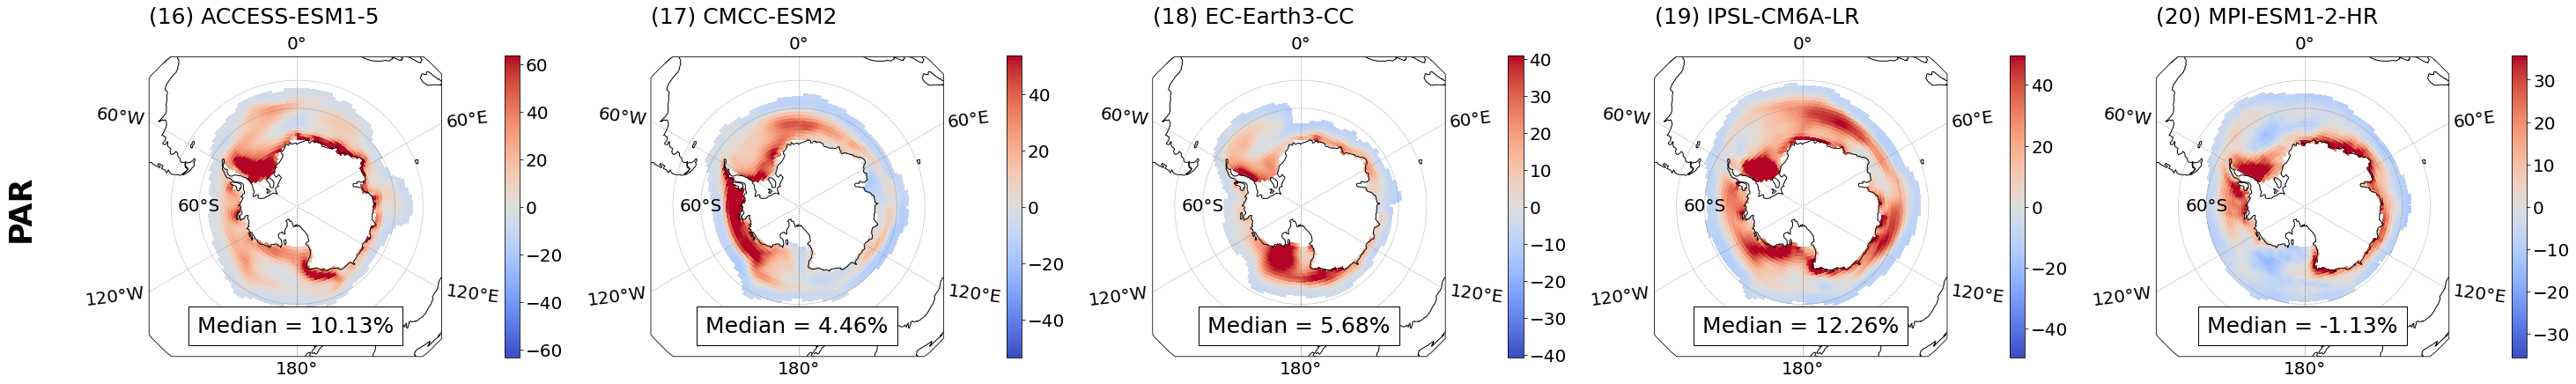

In [187]:
fig, ax = plt.subplots(1, 5, figsize=(45,7), subplot_kw={'projection': cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90)})
fig.subplots_adjust(left = 0.05, wspace = 0.2)
fig.text(0, 0.5, "PAR", va = "center", ha = "left", rotation=90, fontsize = 35, fontweight = "bold")


for i in range(5):
    print(globals()[f"model{i}"])
    name = i+16
    
    ax[i].set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

    gl1 = ax[i].gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


    gl1.ylabel_style = {'size': 20}
    gl1.xlabel_style = {'size': 20}

    gl1.ylocator = mticker.FixedLocator([-60, -50])

    plt.draw()
    for ea in gl1.label_artists:
        if ea[0]== 'lat':
            tx = ea[2]
            xy = tx.get_position()
            if xy[0]!=-90:
                tx.set_position([-90, xy[1]])



    ax[i].set_title("({}) {}".format(name, globals()[f"model{i}"]), fontsize = 25, pad = 15, loc = "left")
    ax[i].TitleHorizontalAlignment = 'left'

    divnorm = colors.TwoSlopeNorm(vmin = -(globals()[f"label{i}"]), vcenter = 0., vmax = globals()[f"label{i}"])

    p = ax[i].pcolor(globals()[f"x{i}"], globals()[f"y{i}"], globals()[f"var{i}"], 
                  cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


    ax[i].coastlines()


    mean2014 = AnchoredText("Median = {0:.2f}%".format(np.nanmedian(globals()[f"var{i}"])), loc="lower center",
                       prop=dict(fontsize=25))
    ax[i].add_artist(mean2014)

    cb = plt.colorbar(p, ax = ax[i], shrink=0.9, pad = 0.15)
    for t in cb.ax.get_yticklabels():
        t.set_fontsize(20)

plt.savefig("output/Multimodel/{}.png".format(variable))

plt.show()

## Iron

In [188]:
variable = "dfeos"
import cartopy.feature as cfeature

In [189]:
files=glob.glob("Data/{}_*_{}_percentage.nc".format(variable,experiment))
files = sorted(files)
files.insert(1, "Data/dfe_CMCC-ESM2_ssp585_percentage.nc")
files.insert(2, "Data/dfe_EC-Earth3-CC_ssp585_percentage.nc")
files

['Data/dfeos_ACCESS-ESM1-5_ssp585_percentage.nc',
 'Data/dfe_CMCC-ESM2_ssp585_percentage.nc',
 'Data/dfe_EC-Earth3-CC_ssp585_percentage.nc',
 'Data/dfeos_IPSL-CM6A-LR_ssp585_percentage.nc',
 'Data/dfeos_MPI-ESM1-2-HR_ssp585_percentage.nc']

In [190]:
nc = xarray.open_dataset("Data/dfe_CMCC-ESM2_ssp585_percentage.nc")
nc["dfe"].values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [191]:
for i in range(5):
    if i == 1:
        print("No data")
        globals()[f"model{i}"] = regex.search(r"(?<=Data/.*?_)[^_]*", files[i]).group()

        nc = xarray.open_dataset(files[i])
        print(files[i])

        lat = nc['lat'].values 
        lon = nc['lon'].values
        globals()[f"var{i}"] = nc["dfe"].values
        var = nc["dfe"].values

        var_upper = np.nanquantile(var[var>0], 0.9)
        var_lower = np.nanquantile(var[var<0], 0.1)
        globals()[f"label{i}"] = abs(max([var_upper, var_lower], key = abs))

        globals()[f"x{i}"], globals()[f"y{i}"] = np.meshgrid(lon, lat)
    elif i == 2:
        print(i)
        globals()[f"model{i}"] = regex.search(r"(?<=Data/.*?_)[^_]*", files[i]).group()

        nc = xarray.open_dataset(files[i])

        lat = nc['lat'].values 
        lon = nc['lon'].values
        globals()[f"var{i}"] = nc["dfe"].values
        var = nc["dfe"].values

        var_upper = np.nanquantile(var[var>0], 0.9)
        var_lower = np.nanquantile(var[var<0], 0.1)
        globals()[f"label{i}"] = abs(max([var_upper, var_lower], key = abs))

        globals()[f"x{i}"], globals()[f"y{i}"] = np.meshgrid(lon, lat)
    else:
        print(i)
        globals()[f"model{i}"] = regex.search(r"(?<=Data/.*?_)[^_]*", files[i]).group()

        nc = xarray.open_dataset(files[i])

        lat = nc['lat'].values 
        lon = nc['lon'].values
        globals()[f"var{i}"] = nc[variable].values
        var = nc[variable].values

        var_upper = np.nanquantile(var[var>0], 0.9)
        var_lower = np.nanquantile(var[var<0], 0.1)
        globals()[f"label{i}"] = abs(max([var_upper, var_lower], key = abs))

        globals()[f"x{i}"], globals()[f"y{i}"] = np.meshgrid(lon, lat)

0
No data
Data/dfe_CMCC-ESM2_ssp585_percentage.nc
2
3
4


ACCESS-ESM1-5
CMCC-ESM2
EC-Earth3-CC
IPSL-CM6A-LR
MPI-ESM1-2-HR


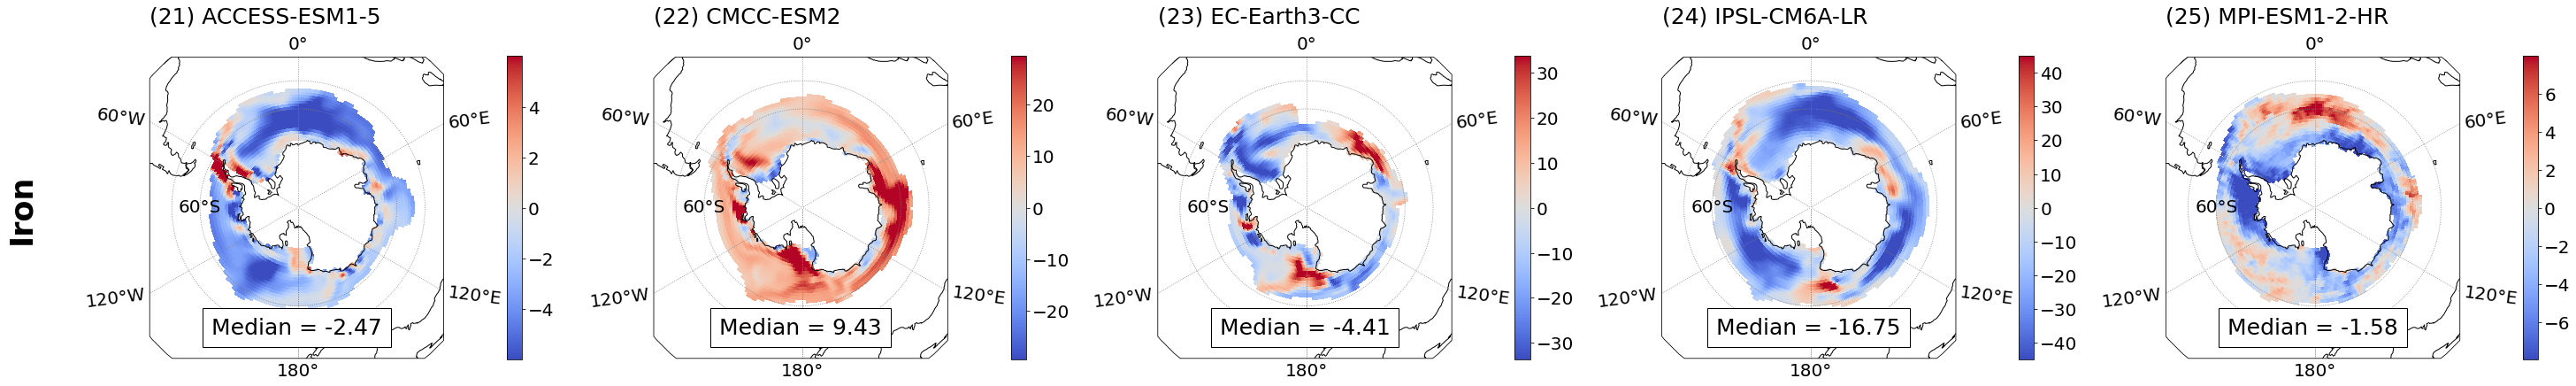

In [192]:
fig, ax = plt.subplots(1, 5, figsize=(45,7), subplot_kw={'projection': cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90)})
fig.subplots_adjust(left = 0.05, wspace = 0.2)
fig.text(0, 0.5, "Iron", va = "center", ha = "left", rotation=90, fontsize = 35, fontweight = "bold")


for i in range(5):
    print(globals()[f"model{i}"])
    name = i+21
    
    ax[i].set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

    gl1 = ax[i].gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


    gl1.ylabel_style = {'size': 20}
    gl1.xlabel_style = {'size': 20}

    gl1.ylocator = mticker.FixedLocator([-60, -50])

    plt.draw()
    for ea in gl1.label_artists:
        if ea[0]== 'lat':
            tx = ea[2]
            xy = tx.get_position()
            if xy[0]!=-90:
                tx.set_position([-90, xy[1]])



    ax[i].set_title("({}) {}".format(name, globals()[f"model{i}"]), fontsize = 25, pad = 15, loc = "left")
    ax[i].TitleHorizontalAlignment = 'left'

    divnorm = colors.TwoSlopeNorm(vmin = -(globals()[f"label{i}"]), vcenter = 0., vmax = globals()[f"label{i}"])

    p = ax[i].pcolor(globals()[f"x{i}"], globals()[f"y{i}"], globals()[f"var{i}"], 
                  cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


    ax[i].coastlines()


    mean2014 = AnchoredText("Median = {0:.2f}".format(np.nanmedian(globals()[f"var{i}"])), loc="lower center",
                       prop=dict(fontsize=25))
    ax[i].add_artist(mean2014)

    cb = plt.colorbar(p, ax = ax[i], shrink=0.9, pad = 0.15)
    for t in cb.ax.get_yticklabels():
        t.set_fontsize(20)

plt.savefig("output/Multimodel/{}.png".format(variable))

plt.show()

## Nitrate

In [193]:
variable = "no3os"
import cartopy.feature as cfeature

In [194]:
files=glob.glob("Data/{}_*_{}_percentage.nc".format(variable,experiment))
files = sorted(files)
files

['Data/no3os_ACCESS-ESM1-5_ssp585_percentage.nc',
 'Data/no3os_CMCC-ESM2_ssp585_percentage.nc',
 'Data/no3os_EC-Earth3-CC_ssp585_percentage.nc',
 'Data/no3os_IPSL-CM6A-LR_ssp585_percentage.nc',
 'Data/no3os_MPI-ESM1-2-HR_ssp585_percentage.nc']

In [195]:
for i in range(5):
    print(i)
    globals()[f"model{i}"] = regex.search(r"(?<=Data/.*?_)[^_]*", files[i]).group()
    
    nc = xarray.open_dataset(files[i])

    lat = nc['lat'].values 
    lon = nc['lon'].values
    globals()[f"var{i}"] = nc[variable].values
    var = nc[variable].values
    
    var_upper = np.nanquantile(var[var>0], 0.9)
    var_lower = np.nanquantile(var[var<0], 0.1)
    globals()[f"label{i}"] = abs(max([var_upper, var_lower], key = abs))
    
    globals()[f"x{i}"], globals()[f"y{i}"] = np.meshgrid(lon, lat)

0
1
2
3
4


ACCESS-ESM1-5
CMCC-ESM2
EC-Earth3-CC
IPSL-CM6A-LR
MPI-ESM1-2-HR


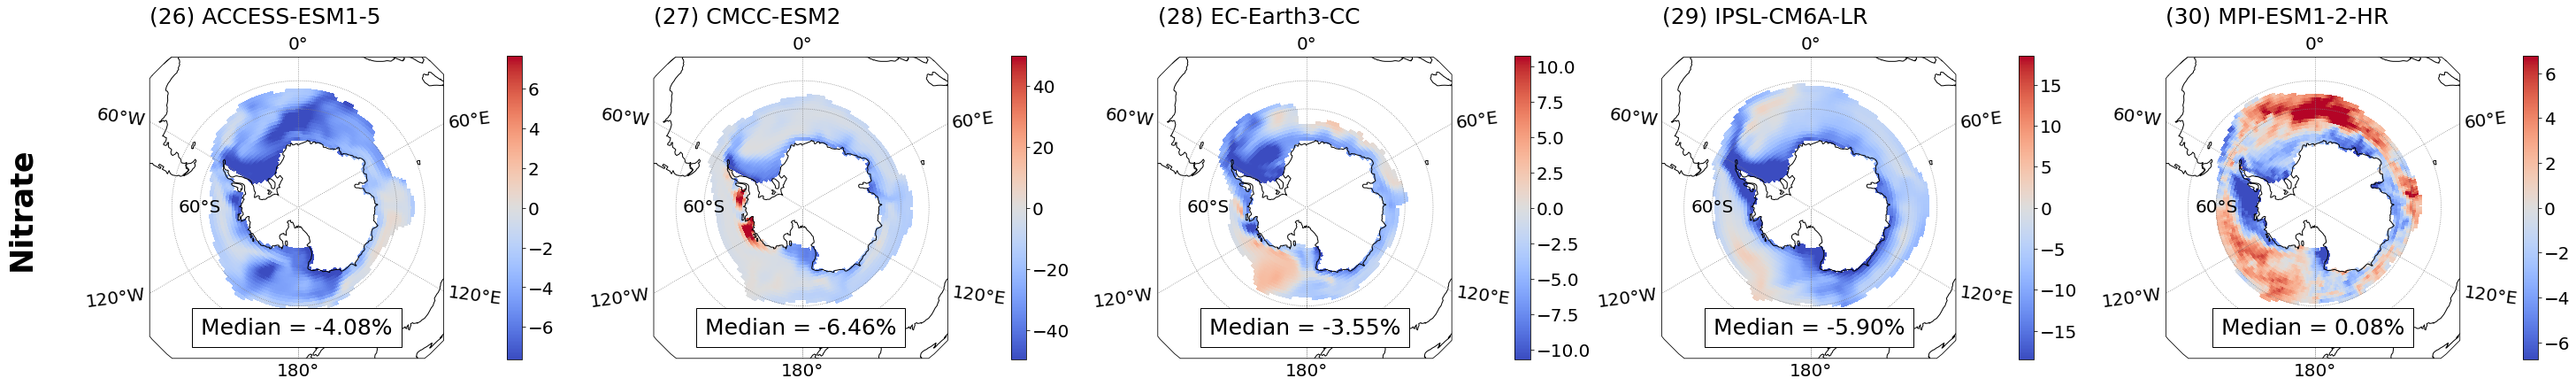

In [196]:
fig, ax = plt.subplots(1, 5, figsize=(45,7), subplot_kw={'projection': cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90)})
fig.subplots_adjust(left = 0.05, wspace = 0.2)
fig.text(0, 0.5, "Nitrate", va = "center", ha = "left", rotation=90, fontsize = 35, fontweight = "bold")


for i in range(5):
    print(globals()[f"model{i}"])
    name = i+26
    
    ax[i].set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

    gl1 = ax[i].gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


    gl1.ylabel_style = {'size': 20}
    gl1.xlabel_style = {'size': 20}

    gl1.ylocator = mticker.FixedLocator([-60, -50])

    plt.draw()
    for ea in gl1.label_artists:
        if ea[0]== 'lat':
            tx = ea[2]
            xy = tx.get_position()
            if xy[0]!=-90:
                tx.set_position([-90, xy[1]])



    ax[i].set_title("({}) {}".format(name, globals()[f"model{i}"]), fontsize = 25, pad = 15, loc = "left")
    ax[i].TitleHorizontalAlignment = 'left'

    divnorm = colors.TwoSlopeNorm(vmin = -(globals()[f"label{i}"]), vcenter = 0., vmax = globals()[f"label{i}"])

    p = ax[i].pcolor(globals()[f"x{i}"], globals()[f"y{i}"], globals()[f"var{i}"], 
                  cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


    ax[i].coastlines()


    mean2014 = AnchoredText("Median = {0:.2f}%".format(np.nanmedian(globals()[f"var{i}"])), loc="lower center",
                       prop=dict(fontsize=25))
    ax[i].add_artist(mean2014)

    cb = plt.colorbar(p, ax = ax[i], shrink=0.9, pad = 0.15)
    for t in cb.ax.get_yticklabels():
        t.set_fontsize(20)

plt.savefig("output/Multimodel/{}.png".format(variable))

plt.show()

## MLD

In [197]:
variable = "mlotst"
import cartopy.feature as cfeature

In [198]:
files=glob.glob("Data/{}_*_{}_percentage.nc".format(variable,experiment))
files = sorted(files)
files

['Data/mlotst_ACCESS-ESM1-5_ssp585_percentage.nc',
 'Data/mlotst_CMCC-ESM2_ssp585_percentage.nc',
 'Data/mlotst_EC-Earth3-CC_ssp585_percentage.nc',
 'Data/mlotst_IPSL-CM6A-LR_ssp585_percentage.nc',
 'Data/mlotst_MPI-ESM1-2-HR_ssp585_percentage.nc']

In [199]:
for i in range(5):
    print(i)
    globals()[f"model{i}"] = regex.search(r"(?<=Data/.*?_)[^_]*", files[i]).group()
    
    nc = xarray.open_dataset(files[i])

    lat = nc['lat'].values 
    lon = nc['lon'].values
    globals()[f"var{i}"] = nc[variable].values
    var = nc[variable].values
    
    var_upper = np.nanquantile(var[var>0], 0.9)
    var_lower = np.nanquantile(var[var<0], 0.1)
    globals()[f"label{i}"] = abs(max([var_upper, var_lower], key = abs))
    
    globals()[f"x{i}"], globals()[f"y{i}"] = np.meshgrid(lon, lat)

0
1
2
3
4


ACCESS-ESM1-5
CMCC-ESM2
EC-Earth3-CC
IPSL-CM6A-LR
MPI-ESM1-2-HR


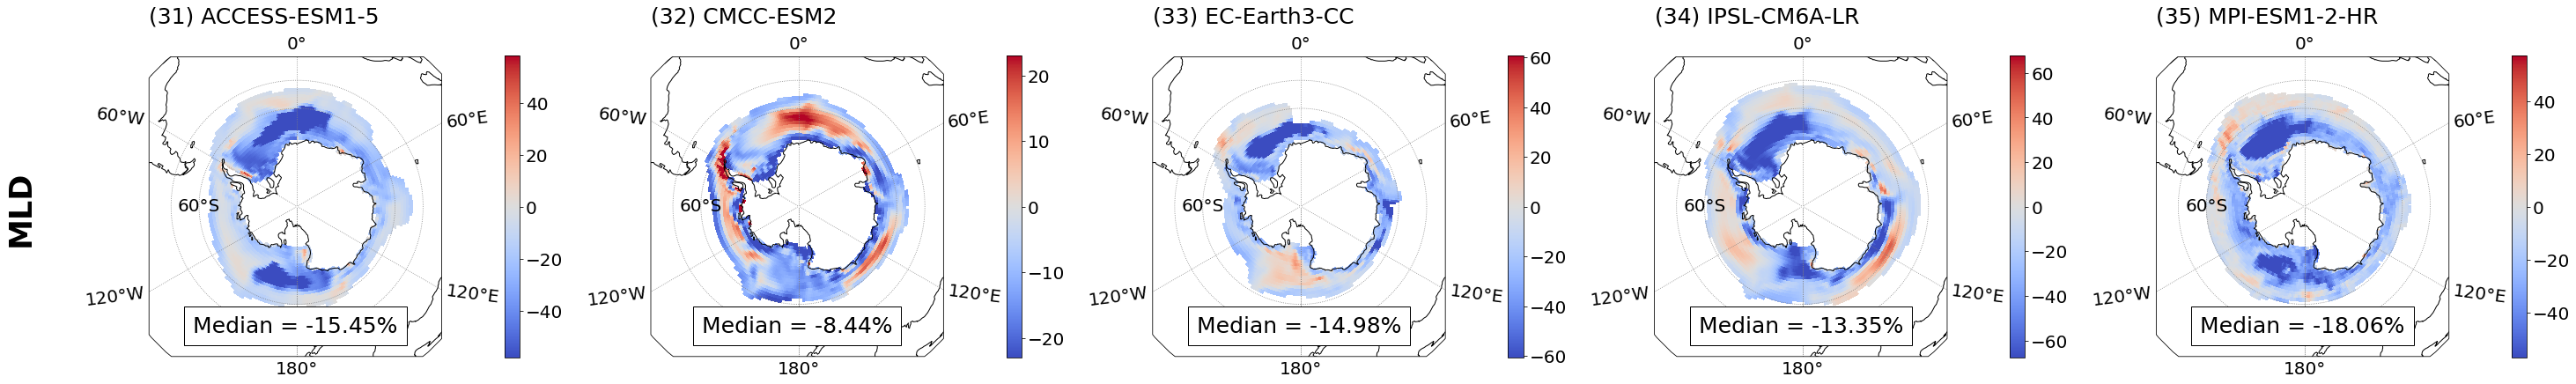

In [200]:
fig, ax = plt.subplots(1, 5, figsize=(45,7), subplot_kw={'projection': cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90)})
fig.subplots_adjust(left = 0.05, wspace = 0.2)
fig.text(0, 0.5, "MLD", va = "center", ha = "left", rotation=90, fontsize = 35, fontweight = "bold")


for i in range(5):
    print(globals()[f"model{i}"])
    name = i+31
    
    ax[i].set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

    gl1 = ax[i].gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


    gl1.ylabel_style = {'size': 20}
    gl1.xlabel_style = {'size': 20}

    gl1.ylocator = mticker.FixedLocator([-60, -50])

    plt.draw()
    for ea in gl1.label_artists:
        if ea[0]== 'lat':
            tx = ea[2]
            xy = tx.get_position()
            if xy[0]!=-90:
                tx.set_position([-90, xy[1]])



    ax[i].set_title("({}) {}".format(name, globals()[f"model{i}"]), fontsize = 25, pad = 15, loc = "left")
    ax[i].TitleHorizontalAlignment = 'left'

    divnorm = colors.TwoSlopeNorm(vmin = -(globals()[f"label{i}"]), vcenter = 0., vmax = globals()[f"label{i}"])

    p = ax[i].pcolor(globals()[f"x{i}"], globals()[f"y{i}"], globals()[f"var{i}"], 
                  cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


    ax[i].coastlines()


    mean2014 = AnchoredText("Median = {0:.2f}%".format(np.nanmedian(globals()[f"var{i}"])), loc="lower center",
                       prop=dict(fontsize=25))
    ax[i].add_artist(mean2014)

    cb = plt.colorbar(p, ax = ax[i], shrink=0.9, pad = 0.15)
    for t in cb.ax.get_yticklabels():
        t.set_fontsize(20)

plt.savefig("output/Multimodel/{}.png".format(variable))

plt.show()

## SST

In [201]:
variable = "tos"
import cartopy.feature as cfeature

In [202]:
files=glob.glob("Data/{}_*_{}_percentage.nc".format(variable,experiment))
files = sorted(files)
files

['Data/tos_ACCESS-ESM1-5_ssp585_percentage.nc',
 'Data/tos_CMCC-ESM2_ssp585_percentage.nc',
 'Data/tos_EC-Earth3-CC_ssp585_percentage.nc',
 'Data/tos_IPSL-CM6A-LR_ssp585_percentage.nc',
 'Data/tos_MPI-ESM1-2-HR_ssp585_percentage.nc']

In [203]:
for i in range(5):
    print(i)
    globals()[f"model{i}"] = regex.search(r"(?<=Data/.*?_)[^_]*", files[i]).group()
    
    nc = xarray.open_dataset(files[i])

    lat = nc['lat'].values 
    lon = nc['lon'].values
    globals()[f"var{i}"] = nc[variable].values
    var = nc[variable].values
    
    var_upper = np.nanquantile(var[var>0], 0.9)
    var_lower = np.nanquantile(var[var<0], 0.1)
    globals()[f"label{i}"] = abs(max([var_upper, var_lower], key = abs))
    
    globals()[f"x{i}"], globals()[f"y{i}"] = np.meshgrid(lon, lat)

0
1
2
3
4


ACCESS-ESM1-5
CMCC-ESM2
EC-Earth3-CC
IPSL-CM6A-LR
MPI-ESM1-2-HR


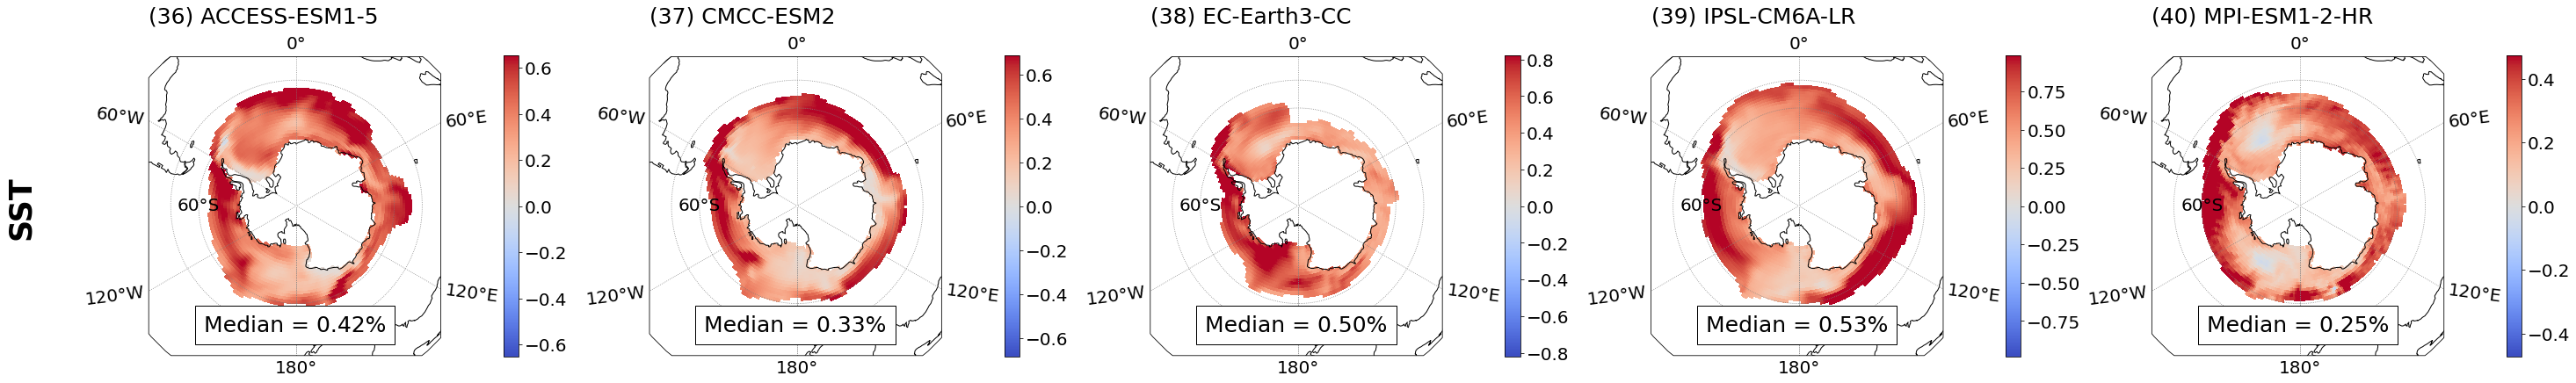

In [204]:
fig, ax = plt.subplots(1, 5, figsize=(45,7), subplot_kw={'projection': cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90)})
fig.subplots_adjust(left = 0.05, wspace = 0.2)
fig.text(0, 0.5, "SST", va = "center", ha = "left", rotation=90, fontsize = 35, fontweight = "bold")


for i in range(5):
    print(globals()[f"model{i}"])
    name = i+36
    
    ax[i].set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

    gl1 = ax[i].gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


    gl1.ylabel_style = {'size': 20}
    gl1.xlabel_style = {'size': 20}

    gl1.ylocator = mticker.FixedLocator([-60, -50])

    plt.draw()
    for ea in gl1.label_artists:
        if ea[0]== 'lat':
            tx = ea[2]
            xy = tx.get_position()
            if xy[0]!=-90:
                tx.set_position([-90, xy[1]])



    ax[i].set_title("({}) {}".format(name, globals()[f"model{i}"]), fontsize = 25, pad = 15, loc = "left")
    ax[i].TitleHorizontalAlignment = 'left'

    divnorm = colors.TwoSlopeNorm(vmin = -(globals()[f"label{i}"]), vcenter = 0., vmax = globals()[f"label{i}"])

    p = ax[i].pcolor(globals()[f"x{i}"], globals()[f"y{i}"], globals()[f"var{i}"], 
                  cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


    ax[i].coastlines()


    mean2014 = AnchoredText("Median = {0:.2f}%".format(np.nanmedian(globals()[f"var{i}"])), loc="lower center",
                       prop=dict(fontsize=25))
    ax[i].add_artist(mean2014)

    cb = plt.colorbar(p, ax = ax[i], shrink=0.9, pad = 0.15)
    for t in cb.ax.get_yticklabels():
        t.set_fontsize(20)

plt.savefig("output/Multimodel/{}.png".format(variable))

plt.show()